<a href="https://colab.research.google.com/github/arvinsingh/ELISA/blob/master/tree/master/JupyterNotebooksMinor_features_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Imports
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from scipy import stats
import itertools
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
stop_words=set(stopwords.words("english"))
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
print('Done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Done


# Various Functions


In [0]:
#reliable = pd.read_csv('drive/My Drive/CSV/reliable_mini.csv')
#fake = pd.read_csv('drive/My Drive/CSV/fake_mini.csv')
clickbait = pd.read_csv('drive/My Drive/CSV/clickbait_mini.csv')
#kaggle = pd.read_csv('drive/My Drive/CSV/train.csv')

In [0]:
def lexical_diversity(text):
    word_count = len(text)
    vocab_size = len(set(text))
    diversity_score = word_count / vocab_size
    return diversity_score

In [0]:
def tokeniz_filter(sentences):
  useless = stopwords.words('english') + list(string.punctuation)
  word_list = nltk.word_tokenize(sentences.lower())
  filtered = [word for word in word_list if word not in useless]
  return filtered, ' '.join(filtered)

In [0]:
def freq_dist_articles(dataframe, column_name, stop_flag = False):
  '''
  Returns word distribution for DataFrame
  '''
  tokenized_word = []
  articles = len(dataframe)
  for i in range(articles):
    if stop_flag:
      tokenized_word.extend([x for x in word_tokenize(dataframe[column_name][i]) if (x not in stop_words and x.isalpha())])
    else:
      tokenized_word.extend(word_tokenize(dataframe[column_name][i]))     
  fdist = FreqDist(tokenized_word)
  return fdist
  
def freq_dist_sentence(sentence,stop_flag = False):
  '''
  Returns for Each Sentence
  '''
  tokenized_word = word_tokenize(sentence.lower())
  if stop_flag:
    tokenized_word = [x for x in tokenized_word if (x not in stop_words and x.isalpha())]
  fdist = FreqDist(tokenized_word)
  return fdist

In [0]:
sid = SentimentIntensityAnalyzer()
def polarity_sc(sentence):
  scores = sid.polarity_scores(sentence)
  return scores

In [0]:
def get_counts(text, word_list):
  words = nltk.tokenize.word_tokenize(text.lower())
  count = 0
  for word in words:
    if word in word_list:
      count += 1
  return count
  

In [0]:
def char_word_dist(input_data, column_name, rows):
    print('Character Length Distribution')
    title_chlen_list = map(lambda x: len(x), input_data[column_name][:rows])
    list_char_dist = list(title_chlen_list)
    print(stats.describe(list_char_dist))
    print()

    print('Word Length Distribution (Assume Separation by Whitespace)')
    title_chlen_list = list(map(lambda x: map(len, x.split(' ')), input_data[column_name][:rows]))
    list_chlen = list(title_chlen_list)
    title_chlen_list = itertools.chain.from_iterable(list_chlen)
    list_word_dist = list(title_chlen_list)
    print(stats.describe(list_word_dist))
    print()

    print('Upper Case Characters Distribution')
    title_cap_list = map(lambda x: sum([1 for i in x if i.isupper()]), input_data[column_name][:rows])
    list_upper_dist = list(title_cap_list)
    print(stats.describe(list_upper_dist))
    print()

    print('Lower Case Characters Distribution')
    title_low_list = map(lambda x: sum([1 for i in x if i.islower()]), input_data[column_name][:rows])
    list_lower_dist = list(title_low_list)
    print(stats.describe(list_lower_dist))
    print()

    print('Punctuation Distribution')
    title_punct_list = map(lambda x: sum([1 for i in x if i in string.punctuation and i is not ' ']), input_data[column_name][:rows])
    list_punc_dict = list(title_punct_list)
    print(stats.describe(list_punc_dict))
    print()
    

In [24]:
char_word_dist(clickbait, 'title',100)

Character Length Distribution
DescribeResult(nobs=100, minmax=(6, 104), mean=75.53, variance=297.86777777777786, skewness=-2.0285595196636352, kurtosis=4.357578309916787)

Word Length Distribution (Assume Separation by Whitespace)
DescribeResult(nobs=1208, minmax=(1, 15), mean=5.335264900662252, variance=6.693635223887148, skewness=0.5228041550364999, kurtosis=-0.0948597176870809)

Upper Case Characters Distribution
DescribeResult(nobs=100, minmax=(1, 41), mean=13.28, variance=37.35515151515152, skewness=0.5278634339570984, kurtosis=3.2200479881674493)

Lower Case Characters Distribution
DescribeResult(nobs=100, minmax=(0, 85), mean=49.06, variance=167.81454545454545, skewness=-1.3710978137833956, kurtosis=3.442303262865704)

Punctuation Distribution
DescribeResult(nobs=100, minmax=(0, 4), mean=1.42, variance=1.235959595959596, skewness=0.22473242702506913, kurtosis=-0.967662771636939)



Analyze the most frequently used words in the entire corpus set.

Objective here is to try to find the most 'baity' words as possible - good for crafting a 'bait' corpus.

In [54]:
polarity_sc('This is positive but I am not sure about it. Actually I have No Idea!!')

{'compound': -0.5464, 'neg': 0.321, 'neu': 0.552, 'pos': 0.127}

In [0]:
d = freq_dist_sentence('hello this is a sentece to be examined Hello hello!!!! !!!! hello', True)

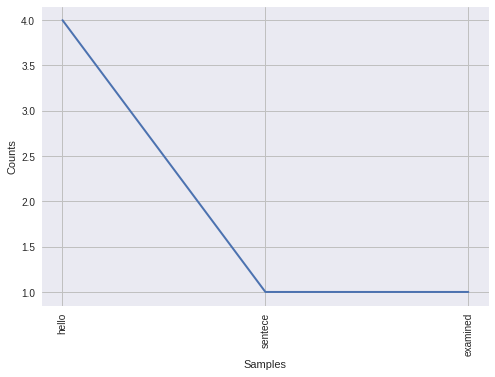

In [13]:
d.plot(30,cumulative=False)

In [0]:
# Stop Flags
distt = freq_dist_articles(clickbait[:50], 'title',True)

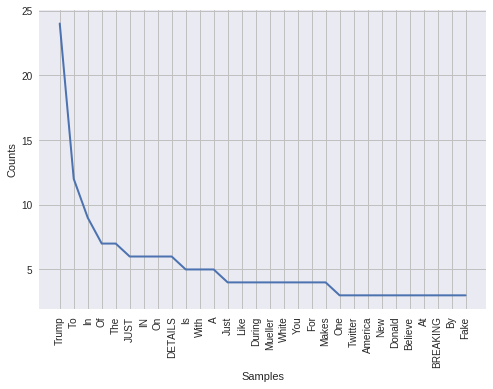

In [15]:
distt.plot(30,cumulative=False)

In [0]:
distt = freq_dist_articles(clickbait[:50], 'title')

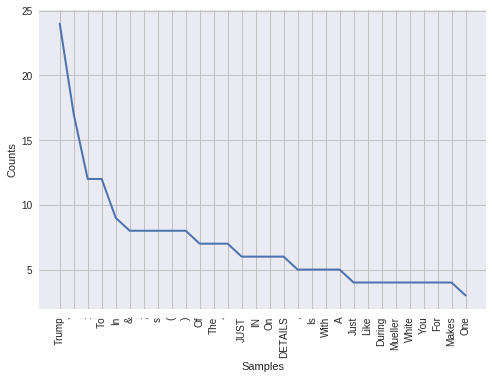

In [19]:
distt.plot(30,cumulative=False)

In [0]:
# Cleaning and processing Data
def find_long_articles(df, len):
    """
    Returns the DataFrame with content length more than
    specific charaters.
    """
    df['length'] = df.content.str.len()
    return df[df.length > len]

def preprocess(Data, col):
    """
    Strip or replace unnecessary details.
    """
    # Remove ampersand
    Data[col] = Data[col].str.replace(r'[%$#]*', '')
    print('Ampersand Removed')
    # Replace & by 'and'
    Data[col] = Data[col].str.replace(r'&', 'and')
    print('& changed to and')
    # Remove 'Headline:' and content before it
    Data[col] = Data[col].str.replace(r'[\s\S]*Headline:[\s\w!]*\s\s', '')
    print('Headline removed')
    # Remove (), [] and content inside
    Data[col] = Data[col].str.replace(r'([\(\[])[\s\S]*([\)\]])\S*', '')
    print('() [] removed')
    # Remove underscores
    Data[col] = Data[col].str.replace(r'_+', ' ')
    print('Underscores removed ')
    # Replace any date by 'date'
    Data[col] = Data[col].str.replace(r'\d+\/\d+\/\d+', 'date')
    print('date changed')
    # Replace any digit by 'number'
    Data[col] = Data[col].str.replace(r'\d*\.*,*:*\d+', 'number')
    print('Number replaced')
    # Remove more than two spaces together
    Data[col] = Data[col].str.replace(r'\s{2,}', ' ')
    print('space unduplicated')
    # Remove Source url
    Data[col] = Data[col].str.replace(r'\s[Ss]\w*:\s\w*:.*', '')
    print('source removed')
    # Remove url in general
    Data[col] = Data[col].str.replace(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '')
    print('url changed')
    return Data

df  = pd.DataFrame()

#path = '../Datasets/LittleSplits/'
path = 'drive/My Drive/CSV/'
newstypes = ['fake',
             'reliable',
            ]

for news_set in newstypes:
    newsDF = pd.read_csv(path + news_set + '_mini.csv', encoding='utf-8')
    newsDF.drop(columns=['authors'], inplace=True)
    # Preprocess the content and title
    newsDF = preprocess(newsDF, 'content')
    newsDF = preprocess(newsDF, 'title')
    # Keep articles with length more than specified minimum
    newsDF = find_long_articles(newsDF, 1000)
    objs = [df, newsDF]
    # Join the datasets
    df = pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=True, 
                   keys=None, levels=None, names=None, verify_integrity=False, 
                   copy=True)
    
 

In [0]:
df.to_csv('drive/My Drive/CSV/clean_fake_reliable.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12886 entries, 0 to 12885
Data columns (total 4 columns):
type       12886 non-null object
content    12886 non-null object
title      12886 non-null object
length     12886 non-null int64
dtypes: int64(1), object(3)
memory usage: 402.8+ KB


**ADDING FEATURES**

In [0]:
df['i_me_myself'] = df['content'].apply(get_counts,args = (['i', 'me', 'myself'],))
df['punct'] = df['content'].apply(get_counts,args = ([',','.', '!', '?'],))
df['lexical_diversity'] = df['content'].apply(lexical_diversity)


In [98]:
df.head()

,type,content,title,length,i_me_myself,punct,lexical_diversity
0,fake,"Quite frankly, I’m surprised it has half left....",Surprise: Socialist Hotbed Of Venezuela Has Lo...,1492,1,30,30.448980
1,fake,"If You Are Upset About Being Called Fake News,...",Water Cooler date Open Thread; Fake News ? CNN...,2355,0,32,42.053571
2,fake,Let’s be honest: This is pretty much all of Fo...,Veteran Commentator Calls Out the Growing “Eth...,2171,6,48,38.767857
3,fake,"Let me tell you something, about otters and mo...","Lost Words, Hidden Words, Otters, Banks and Books",3131,13,72,61.392157
4,fake,Never mind transportation and power generation...,Why Sandwiches Must Be Banned,1650,0,21,31.132075


In [0]:

import textstat

In [0]:
df['flesch_reading_ease'] = df['content'].apply(lambda x: textstat.flesch_reading_ease(x))
df['smog_index'] = df['content'].apply(lambda x: textstat.smog_index(x))
df['flesch_kincaid_grade'] = df['content'].apply(lambda x: textstat.flesch_kincaid_grade(x))
df['coleman_liau_index'] = df['content'].apply(lambda x: textstat.coleman_liau_index(x))
df['automated_readability_index'] = df['content'].apply(lambda x: textstat.automated_readability_index(x))
df['dale_chall_readability_score'] = df['content'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['difficult_words'] = df['content'].apply(lambda x: textstat.difficult_words(x))
df['linsear_write_formula'] = df['content'].apply(lambda x: textstat.linsear_write_formula(x))
df['gunning_fog'] = df['content'].apply(lambda x: textstat.gunning_fog(x))
df['text_standard'] = df['content'].apply(lambda x: textstat.text_standard(x))

In [104]:
df.head()

,type,content,title,length,i_me_myself,punct,lexical_diversity,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
0,fake,"Quite frankly, I’m surprised it has half left....",Surprise: Socialist Hotbed Of Venezuela Has Lo...,1492,1,30,30.448980,55.95,12.2,9.3,13.97,12.1,8.79,64,9.000000,19.25,8th and 9th grade
1,fake,"If You Are Upset About Being Called Fake News,...",Water Cooler date Open Thread; Fake News ? CNN...,2355,0,32,42.053571,55.17,12.7,11.6,12.25,14.5,8.21,83,15.500000,20.27,11th and 12th grade
2,fake,Let’s be honest: This is pretty much all of Fo...,Veteran Commentator Calls Out the Growing “Eth...,2171,6,48,38.767857,64.75,10.3,10.0,11.09,13.0,7.76,70,11.600000,18.85,9th and 10th grade
3,fake,"Let me tell you something, about otters and mo...","Lost Words, Hidden Words, Otters, Banks and Books",3131,13,72,61.392157,81.33,8.1,5.7,7.65,6.9,6.33,71,8.166667,13.02,5th and 6th grade
4,fake,Never mind transportation and power generation...,Why Sandwiches Must Be Banned,1650,0,21,31.132075,33.21,17.9,18.0,13.76,22.2,9.33,64,34.500000,26.78,17th and 18th grade


In [110]:
!ls -la -h drive/My\ Drive/CSV/clean_fake_reliable_features.csv

-rw------- 1 root root 42M Nov  3 18:10 'drive/My Drive/CSV/clean_fake_reliable_features.csv'
